<a href="https://colab.research.google.com/github/simionattovini/Hoisting-and-Rigging-Machinery/blob/main/Pendulum%20Load%20Traversing/MET_Sistema_com_Carga_Pendular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema com Carga Pendular - Simulação

## Simulação

A princípio, precisamos entrar com os dados do sistema. Tais dados se encontram a seguir. A função ```f(t)``` deve representar a força aplicada no sistema (no caso, o carrinho) em um instante $t$.

In [ ]:
# Dados do sistema:

M = 200   # kg
m = 10    # kg
L = 10    # m
Ig = 3    # kg.m²
g = 9.81  # m/s²

def f(t):
  if 0<t<1:
    F = 100
  elif 6<t<7:
    F = -100
  else:
    F = 0
  return F

A seguir, realizamos a modelagem dinâmica do sistema, e após linearização do modelo, encontramos as seguintes equações:

$$
\left[\begin{array}{cc}
I_g + ML^2 & ML \\ ML & M+m
\end{array}
\right]
\left\{
\begin{array}{c}
\ddot{\theta} \\ \ddot{x}
\end{array}
\right\}
+
\left[\begin{array}{cc}
MgL & 0 \\ 0 & 0
\end{array}
\right]
\left\{
\begin{array}{c}
\theta \\ x
\end{array}
\right\}
=
\left\{
\begin{array}{c}
0 \\ f(t)
\end{array}
\right\}
$$

As matrizes de inércia e rigidez deste sistema são, então:

$$
M_I = \left[\begin{array}{cc}
I_g + ML^2 & ML \\ ML & M+m
\end{array}
\right]
\hspace{10mm} \mathrm{e} \hspace{10mm}
M_K = \left[\begin{array}{cc}
MgL & 0 \\ 0 & 0
\end{array}
\right]
$$

In [ ]:
# Matrizes do sistema em malha aberta:

import numpy as np

MI = np.asarray([[Ig+M*L**2, M*L], [M*L, M+m]])
MK = np.asarray([[M*g*L, 0], [0, 0]])

Para realizar a integração numérica, utilizaremos um integrador de primeira ordem, o que significa que apenas equações com derivada de ordem 1 podem ser resolvidas. Nosso sistema é de segunda ordem, e por isso precisaremos fazer algo chamado _Tranformação para Forma de Estados_.

Neste caso, podemos partir de um sistema linear, de segunda ordem, genérico, na forma:

$$
[M]\{\ddot{y}\} + [C] \{\dot{y}\} + [K]\{y\} = \{F(t)\}
$$

Neste caso, temos um vetor de variáveis da forma:
$$
\{y\} =
\left\{
\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{array}
\right\}
$$

Para reduzir a ordem da equação que temos, iremos propor um conjunto de _estados_ $p$ e $q$ na forma:

$$
\{p\} =
\left\{
\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{array}
\right\}
\hspace{10mm} , \hspace{10mm}
\{q\} =
\left\{
\begin{array}{c}
\dot{y}_1 \\ \dot{y}_2 \\ \vdots \\ \dot{y}_n
\end{array}
\right\}
$$

Assim, A equação de movimento pode ser escrita por:

$$
[M]\{\dot{q}\} + [C] \{q\} + [K]\{p\} = \{F(t)\}
$$

Ou seja, ela, agora, é uma equação de primeira ordem, mas que depende de duas variáveis vetoriais $\{p\}$ e $\{q\}$ diferentes. Porém, também sabemos que:

$$
\{\dot{p}\} = \{q\}
$$

Assim, trocamos $n$ equações lineares de segunda ordem por $2n$ equações lineares de primeira ordem. Nosso sistema passa agora a ser representado pelas equações:

$$
\left\{
\begin{array}{l}
\{\dot{p}\} = \{q\} \\
[M]\{\dot{q}\} + [C] \{q\} + [K]\{p\} = \{F(t)\}
\end{array}
\right.
$$

Na segunda equação, podemos isolar $\{\dot{q}\}$ para obter:

$$
\left\{
\begin{array}{l}
\{\dot{p}\} = \{q\} \\
\{\dot{q}\} = - [M]^{-1}[C] \{q\} - [M]^{-1}[K]\{p\} + [M]^{-1}\{F(t)\}
\end{array}
\right.
$$

Definindo o _Vetor de Estados_ $\{z\}$ na forma:

$$
\{z\} =
\left\{
\begin{array}{c}
\{p\} \\ \{q\}
\end{array}
\right\}
=
\left\{
\begin{array}{c}
\left\{
\begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{array}
\right\}
\\
\left\{
\begin{array}{c}
\dot{y}_1 \\ \dot{y}_2 \\ \vdots \\ \dot{y}_n
\end{array}
\right\}
\end{array}
\right\}
$$

Podemos finalmente escrever o sistema na forma matricial de tamanho $2n$:

$$
\{\dot{z}\} =
\left[
\begin{array}{cc}
[0]_{n\times n} & [I]_{n\times n} \\
-[M]^{-1}[K] & -[M]^{-1}[C]
\end{array}
\right]
\{z\}
+
\left[
\begin{array}{c}
[0]_{n\times n} \\ [M]^{-1}
\end{array}
\right]
\{F(t)\}
$$

Neste caso, a forma de estados do sistema é dada por:
$$
\{\dot{z}\} = [A]\{z\} + [B]\{F(t)\}
$$

Sendo:
$$
[A] =
\left[
\begin{array}{cc}
[0]_{n\times n} & [I]_{n\times n} \\
-[M]^{-1}[K] & -[M]^{-1}[C]
\end{array}
\right]
\hspace{10mm} \mathrm{e} \hspace{10mm}
[B] =
\left[
\begin{array}{c}
[0]_{n\times n} \\ [M]^{-1}
\end{array}
\right]
$$

A matriz $[A]$ é chamada de _matriz do sistema_ e a matriz $[B]$ é chamada de _matriz de entrada_. A matriz $[B]$ pode ser simplificada em outros casos, mas por hora trabalharemos com esta forma.

A seguir, com esta forma de estados, faremos a integração numérica do sistema.

In [ ]:
# Integração Numérica

from scipy.integrate import solve_ivp

# Parâmetros de integração

t_span = [0, 10]
Npts = 1000
T = np.linspace(t_span[0], t_span[1], 1000)


# Integração

A = np.append(np.append(np.zeros((2, 2)), np.eye(2), 1),
              np.append(-np.linalg.inv(MI) @ MK, np.zeros((2, 2)), 1),
              0)

B = np.append(np.zeros((2, 2)), np.linalg.inv(MI), 0)

def sysfun(t, y, A, B):
  return A @ y + B @ np.asarray([0, f(t)])

y0 = np.zeros((4, ))

sol = solve_ivp(lambda t, y: sysfun(t, y, A, B), t_span, y0, t_eval=T)

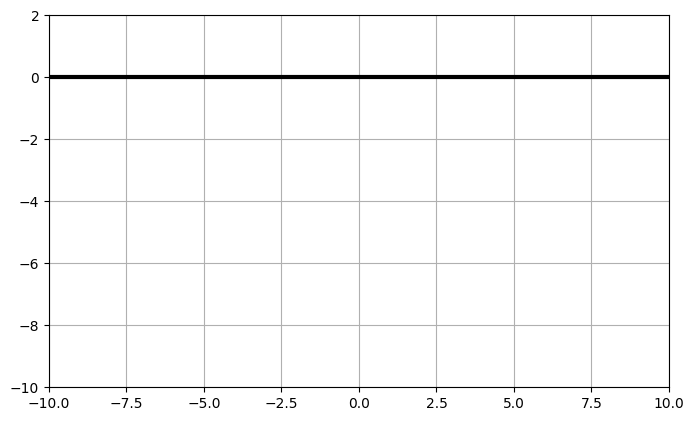

In [ ]:
# Animação

import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure(figsize=(8, 6))

xlim = [-10, 10]
ylim = [-10, 2]

ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
ax.plot(xlim, [0, 0], 'k', linewidth=3)
ax.grid(True)
trolley_body, = ax.plot([], [], 'b', linewidth=2)
trolley_wheel_1, = ax.plot([], [], 'k', linewidth=2)
trolley_wheel_2, = ax.plot([], [], 'k', linewidth=2)
pendulum_rod, = ax.plot([], [], color=[0.4, 0.4, 0.4], linewidth=1.5)
pendulum_bob, = ax.plot([], [], 'ko', markersize=100, markerfacecolor='k')
force_arrow, = ax.plot([], [], 'r', linewidth=1.5)


In [ ]:
nframes = Npts;

trwid = 1.5    # Largura do carrinho
trhei = 0.7    # Altura do carrinho
whdiam = 0.3   # Diâmetro das rodas
fscale = 0.01  # Escala do vetor de força

def circlepts(x, y, r, n=10):
  th = np.linspace(0, 2*np.pi, n+1)
  return x+r*np.cos(th), y+r*np.sin(th)

def update_trolley(x,
                   trolley_body,
                   trolley_wheel_1,
                   trolley_wheel_2,
                   wid, hei, diam):
  trolley_body.set_data([x-wid/2, x+wid/2, x+wid/2, x-wid/2, x-wid/2],
                        [diam, diam, diam+hei, diam+hei, diam])
  wh = circlepts(x-wid/2+diam, diam/2, diam/2)
  trolley_wheel_1.set_data(wh[0], wh[1])
  wh = circlepts(x+wid/2-diam, diam/2, diam/2)
  trolley_wheel_2.set_data(wh[0], wh[1])

def update_pendulum(x, th,
                    pendulum_rod,
                    pendulum_bob,
                    wid, hei, diam, L):
  pendulum_rod.set_data([x, x+L*np.sin(th)],
                        [diam+hei/2, diam+hei/2-L*np.cos(th)])
  pendulum_bob.set_data([x+L*np.sin(th)],
                        [diam+hei/2-L*np.cos(th)])

def update_force_arrow(x, force, scale, force_arrow, wid, hei, diam):
  f_len = np.abs(force*scale)
  f_tip = min(f_len, diam/2)
  if force>0:
    force_arrow.set_data([x+wid/2,
                          x+wid/2+f_len,
                          x+wid/2+f_len-f_tip,
                          x+wid/2+f_len,
                          x+wid/2+f_len-f_tip,
                          x+wid/2+f_len],
                         [diam+hei/2,
                          diam+hei/2,
                          diam+hei/2+f_tip,
                          diam+hei/2,
                          diam+hei/2-f_tip,
                          diam+hei/2])
  elif force<0:
    force_arrow.set_data([x-wid/2,
                          x-wid/2-f_len,
                          x-wid/2-f_len+f_tip,
                          x-wid/2-f_len,
                          x-wid/2-f_len+f_tip,
                          x-wid/2-f_len],
                         [diam+hei/2,
                          diam+hei/2,
                          diam+hei/2+f_tip,
                          diam+hei/2,
                          diam+hei/2-f_tip,
                          diam+hei/2])
  else:
    force_arrow.set_data([0],[0])


def mydrawframe(n,
                trolley_body,
                trolley_wheel_1,
                trolley_wheel_2,
                pendulum_rod,
                pendulum_bob,
                force_arrow,
                wid,
                hei,
                diam,
                L,
                scale,
                xdata,
                thdata,
                fdata):


  update_trolley(xdata[n],
                 trolley_body,
                 trolley_wheel_1,
                 trolley_wheel_2,
                 wid, hei, diam)

  update_pendulum(xdata[n], thdata[n],
                  pendulum_rod,
                  pendulum_bob,
                  wid, hei, diam, L)

  update_force_arrow(xdata[n], fdata[n], scale, force_arrow, wid, hei, diam)

  return (trolley_body,
         trolley_wheel_1,
         trolley_wheel_2,
         pendulum_rod,
         pendulum_bob,
         force_arrow)

fdata = np.asarray(list(map(f, sol.t)))

drawframe = lambda n : mydrawframe(n,
                                  trolley_body,
                                  trolley_wheel_1,
                                  trolley_wheel_2,
                                  pendulum_rod,
                                  pendulum_bob,
                                  force_arrow,
                                  trwid,
                                  trhei,
                                  whdiam,
                                  L,
                                  fscale,
                                  sol.y[:][1],
                                  sol.y[:][0],
                                  fdata)


anim = animation.FuncAnimation(fig, drawframe,
                               frames=nframes, interval=t_span[1], blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())